<a href="https://colab.research.google.com/github/charviadikar/1BM22CS012-ML-LAB/blob/main/1BM22CS012_Lab4_Linear_Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files


uploaded = files.upload()

Saving homeprices_Multiple_LR.csv to homeprices_Multiple_LR.csv
Saving housing_area_price.csv to housing_area_price (1).csv
Saving 1000_Companies.csv to 1000_Companies (1).csv
Saving salary.csv to salary (1).csv
Saving hiring.csv to hiring (1).csv
Saving canada_per_capita_income.csv to canada_per_capita_income (1).csv


**linear_regression_housing_area_price**

Predicted price for 3300 sq ft: $628,715.75
Model coefficient: [135.78767123]
Model intercept: 180616.43835616432
Manually computed price for 3300 sq ft: $628,715.75
Predicted price for 5000 sq ft: $859,554.79


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


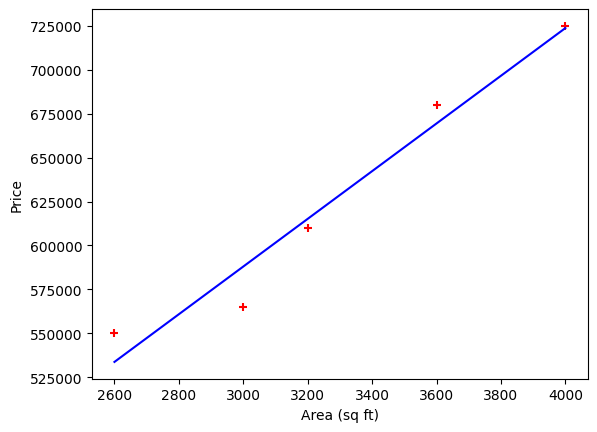

In [6]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('housing_area_price.csv')

plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.scatter(df.area, df.price, color='red', marker='+')

new_df = df.drop('price', axis='columns')
price = df.price

reg = linear_model.LinearRegression()
reg.fit(new_df, price)

predicted_price_3300 = reg.predict([[3300]])
print(f"Predicted price for 3300 sq ft: ${predicted_price_3300[0]:,.2f}")

print(f"Model coefficient: {reg.coef_}")
print(f"Model intercept: {reg.intercept_}")

manual_price_3300 = 3300 * reg.coef_[0] + reg.intercept_
print(f"Manually computed price for 3300 sq ft: ${manual_price_3300:,.2f}")

predicted_price_5000 = reg.predict([[5000]])
print(f"Predicted price for 5000 sq ft: ${predicted_price_5000[0]:,.2f}")

plt.plot(df.area, reg.predict(df[['area']]), color='blue')

**multiple_lr_homeprice**

In [9]:
import pandas as pd
import numpy as np
from sklearn import linear_model

df = pd.read_csv('homeprices_Multiple_LR.csv')
df.bedrooms.median()
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
reg = linear_model.LinearRegression()
reg.fit(df.drop('price', axis='columns'), df.price)
reg.coef_
reg.intercept_
reg.predict([[3000, 3, 40]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

**canada_per_capita_income**

Coefficient: [828.46507522]
Intercept: -1632210.7578554575
Predicted per capita income for 2020: $41,288.69


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


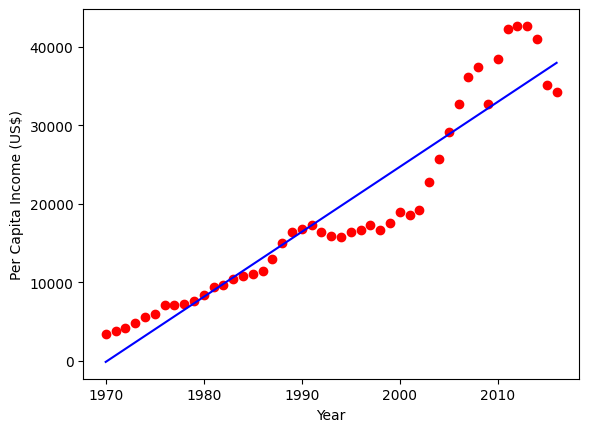

In [10]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('canada_per_capita_income.csv')

reg = linear_model.LinearRegression()
reg.fit(df[['year']], df['per capita income (US$)'])

print(f"Coefficient: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

predicted_income = reg.predict([[2020]])
print(f"Predicted per capita income for 2020: ${predicted_income[0]:,.2f}")

plt.scatter(df['year'], df['per capita income (US$)'], color='red')
plt.plot(df['year'], reg.predict(df[['year']]), color='blue')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.show()


**salary**

Coefficient: [9398.64060184]
Intercept: 26265.98773185531
Predicted salary for 4 years of experience: $63,860.55


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


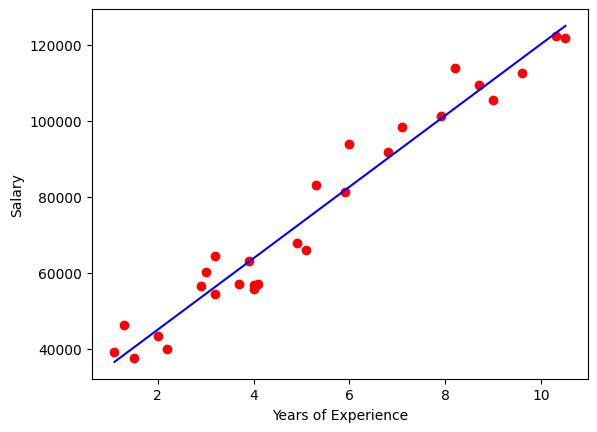

In [11]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('salary.csv')
df = df.dropna(subset=['YearsExperience', 'Salary'])

X = df[['YearsExperience']]
y = df['Salary']

reg = linear_model.LinearRegression()
reg.fit(X, y)

print(f"Coefficient: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

predicted_salary = reg.predict([[4]])
print(f"Predicted salary for 4 years of experience: ${predicted_salary[0]:,.2f}")

plt.scatter(df['YearsExperience'], df['Salary'], color='red')
plt.plot(df['YearsExperience'], reg.predict(df[['YearsExperience']]), color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


**multiple regression hiring**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df_hiring = pd.read_csv('hiring.csv')

print("Original Data:")
print(df_hiring.head())

df_hiring['experience'] = df_hiring['experience'].replace({
    'five': 5,
    'four': 4,
    'three': 3
})

df_hiring['experience'] = pd.to_numeric(df_hiring['experience'], errors='coerce')
df_hiring['test_score(out of 10)'] = pd.to_numeric(df_hiring['test_score(out of 10)'], errors='coerce')
df_hiring['interview_score(out of 10)'] = pd.to_numeric(df_hiring['interview_score(out of 10)'], errors='coerce')
df_hiring['salary($)'] = pd.to_numeric(df_hiring['salary($)'], errors='coerce')

df_hiring['experience'] = df_hiring['experience'].fillna(df_hiring['experience'].median())
df_hiring['test_score(out of 10)'] = df_hiring['test_score(out of 10)'].fillna(df_hiring['test_score(out of 10)'].median())
df_hiring['interview_score(out of 10)'] = df_hiring['interview_score(out of 10)'].fillna(df_hiring['interview_score(out of 10)'].median())
df_hiring['salary($)'] = df_hiring['salary($)'].fillna(df_hiring['salary($)'].median())

X_hiring = df_hiring[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y_hiring = df_hiring['salary($)']

model_hiring = LinearRegression()
model_hiring.fit(X_hiring, y_hiring)

print(f"\nCoefficients: {model_hiring.coef_}")
print(f"Intercept: {model_hiring.intercept_}")

predictions_hiring = model_hiring.predict([[2, 9, 6], [12, 10, 10]])

print(f"\nPredicted salary for candidate 1 (2 years experience, 9 test score, 6 interview score): ${predictions_hiring[0]:,.2f}")
print(f"Predicted salary for candidate 2 (12 years experience, 10 test score, 10 interview score): ${predictions_hiring[1]:,.2f}")




Original Data:
  experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000

Coefficients: [-793.62416107   -5.03355705  139.26174497]
Intercept: 65117.44966442955

Predicted salary for candidate 1 (2 years experience, 9 test score, 6 interview score): $64,320.47
Predicted salary for candidate 2 (12 years experience, 10 test score, 10 interview score): $56,936.24


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**multiple regression 1000 companies**




In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv('1000_Companies.csv')

# Calculate the mean of only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']

model = LinearRegression()
model.fit(X, y)

input_data = [[91694.48, 515841.3, 11931.24]]
predicted_profit = model.predict(input_data)
print(reg.coef_)
print(reg.intercept_)

print(f"Predicted profit for given inputs: ${predicted_profit[0]:,.2f}")

[9398.64060184]
26265.98773185531
Predicted profit for given inputs: $511,177.32


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
